# Convolutional Neural Networks (CNN)

In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
REBUILD_DATA = True

class DogsVSCats():
    img_size = 50
    cats = "C:/Users/user/Downloads/Timmtet/Projects/Deep learning/CNN/kagglecatsanddogs_5340/PetImages/Cat"
    dogs = "C:/Users/user/Downloads/Timmtet/Projects/Deep learning/CNN/kagglecatsanddogs_5340/PetImages/Dog"
    labels = {cats : 0, dogs:1}
    training_data = []
    cat_count = 0
    dog_count = 0
    
    
    def making_training_data(self):
        for label in self.labels:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.img_size, self.img_size))
                    self.training_data.append([np.array(img), np.eye(2)[self.labels[label]]])
                    #self.training_data.append([np.array(img), self.labels[label]])

                    if label == self.cats:
                        self.cat_count +=1
                    elif label == self.dogs:
                        self.dog_count +=1
                        
                except Exception as e:
                    pass
                
        np.random.shuffle(self.training_data)
        #np.save("training_data.npy", self.training_data)
        with open("training_data.pkl", "wb") as f:
            pickle.dump(self.training_data, f)
        
        print("Cats: ", self.cat_count)
        print("Dogs: ", self.dog_count)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.making_training_data()

C:/Users/user/Downloads/Timmtet/Projects/Deep learning/CNN/kagglecatsanddogs_5340/PetImages/Cat


 30%|██████████████████████▉                                                      | 3716/12501 [00:53<02:06, 69.40it/s]

KeyboardInterrupt



In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #(input, output, cornel size(5*5))
        self.conv1 = nn.Conv2d(1,32, 5)
        self.conv2 = nn.Conv2d(32,64, 5)
        self.conv3 = nn.Conv2d(64,128, 5)
        
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512,2)
        
    def convs(self, x):
        #(2,2) is the shape of the max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        
        # This print statement will give us the shape of input for the dense/linear layer
        print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
        
        return x
    
    def forward(self,x):
        x = self.convs(x)                  # we pass x through all the convolutional layers
        x =x.view(-1, self._to_linear )    # we flatten the output of the convolution layer. self._to_linear is the input shape of
                                            # of the linear layer we are trying to linear year.
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.softmax(x, dim=1)
             
net = Net() 
    
        
        
        

torch.Size([128, 2, 2])


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #(input, output, cornel size(5*5))
        self.conv1 = nn.Conv2d(1,32, 5)
        self.conv2 = nn.Conv2d(32,64, 5)
        self.conv3 = nn.Conv2d(64,128, 5)
        
        self.fc1 = nn.Linear(2*2*128, 512)
        self.fc2 = nn.Linear(512,2)
        
    def convs(self, x):
        #(2,2) is the shape of the max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        return x
    
    def forward(self,x):
        x = self.convs(x)                  
        x =x.view(-1,2*2*128)   
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.softmax(x, dim=1)
             
net = Net() 
    
        
        
        

In [6]:
training_data = np.load("training_data.pkl", allow_pickle=True)

import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_function = nn.MSELoss()

X  = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/225.0

y  = torch.Tensor([i[1] for i in training_data])


VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

C:\Users\user\AppData\Local\Temp\ipykernel_4232\3472780919.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X  = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


2494


In [7]:
train_x = X[:-val_size]
train_y = y[:-val_size]

test_x = X[-val_size:]
test_y = y[-val_size:]

print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

22452
22452
2494
2494


In [8]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
        print (i, i+BATCH_SIZE)
    
    

100%|█████████████████████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 56321.22it/s]

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000
1000 1100
1100 1200
1200 1300
1300 1400
1400 1500
1500 1600
1600 1700
1700 1800
1800 1900
1900 2000
2000 2100
2100 2200
2200 2300
2300 2400
2400 2500
2500 2600
2600 2700
2700 2800
2800 2900
2900 3000
3000 3100
3100 3200
3200 3300
3300 3400
3400 3500
3500 3600
3600 3700
3700 3800
3800 3900
3900 4000
4000 4100
4100 4200
4200 4300
4300 4400
4400 4500
4500 4600
4600 4700
4700 4800
4800 4900
4900 5000
5000 5100
5100 5200
5200 5300
5300 5400
5400 5500
5500 5600
5600 5700
5700 5800
5800 5900
5900 6000
6000 6100
6100 6200
6200 6300
6300 6400
6400 6500
6500 6600
6600 6700
6700 6800
6800 6900
6900 7000
7000 7100
7100 7200
7200 7300
7300 7400
7400 7500
7500 7600
7600 7700
7700 7800
7800 7900
7900 8000
8000 8100
8100 8200
8200 8300
8300 8400
8400 8500
8500 8600
8600 8700
8700 8800
8800 8900
8900 9000
9000 9100
9100 9200
9200 9300
9300 9400
9400 9500
9500 9600
9600 9700
9700 9800
9800 9900
9900 10000
10000 10100
10100 10

The above means for the training, we will be going from the zeroth to the hundredth and so on

In [9]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
        batch_x = train_x[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]
        
        net.zero_grad()
        # You could also zero the graident of your optimizer if you've gat just one. if you've gat more than one
        # you could also specify the optimizer you want to Zero the gtadient.
        # e.g optimizer.zero_grad()
        
        outputs = net(batch_x)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
print(loss)
        

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:27<00:00,  1.53it/s]

tensor(0.2177, grad_fn=<MseLossBackward0>)


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_x))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_x[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct +=1
        total += 1
        
print("Accuracy: ", round(correct/total, 3))
            
        

100%|█████████████████████████████████████████████████████████████████████████████| 2494/2494 [00:07<00:00, 320.61it/s]

Accuracy:  0.667


# Running on GPU

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
torch.cuda.is_available()

False

In [13]:
if torch.cuda.is_available(): 
    device = torch.device('cuda:0')
    print('Running on the GPU')
else:
    device = torch.device('cpu')
    print('Running on the CPU')

Running on the CPU


In [14]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [15]:
def train(net):
    
    BATCH_SIZE = 100
    EPOCHS = 5
    
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    loss_function = nn.MSELoss()

    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
            batch_x = train_x[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]
            
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            
            net.zero_grad()
            # You could also zero the graident of your optimizer if you've gat just one. if you've gat more than one
            # you could also specify the optimizer you want to Zero the gtadient.
            # e.g optimizer.zero_grad()

            outputs = net(batch_x)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
        print(f"Ephoch: {epoch}, Loss: {loss}")

train(net)
        


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:35<00:00,  1.45it/s]


Ephoch: 0, Loss: 0.21728697419166565


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:25<00:00,  1.55it/s]


Ephoch: 1, Loss: 0.19797588884830475


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:48<00:00,  1.33it/s]


Ephoch: 2, Loss: 0.18130278587341309


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:48<00:00,  1.33it/s]


Ephoch: 3, Loss: 0.14078746736049652


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:49<00:00,  1.33it/s]

Ephoch: 4, Loss: 0.14096102118492126


In [16]:
def test(net):
    
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_x))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_x[i].view(-1,1,50,50).to(device))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct +=1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

test(net)

100%|█████████████████████████████████████████████████████████████████████████████| 2494/2494 [00:06<00:00, 360.68it/s]

Accuracy:  0.759


## Model Aanlysis

In [27]:
import time

In [20]:
def fwd_pass(X, y, train = False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)
    
    if train:
        loss.backward()
        optimizer.step()
        
    return acc, loss



def test(size =32):
    random_start = np.random.randint(len(test_x)-size)
    X, y = test_x[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device), y.to(device))
    return  val_acc, val_loss

val_acc, val_loss = test(size = 32)
print(val_acc, val_loss)
    

0.8125 tensor(0.1496)


In [25]:
import time

Model_name = f'model-{int(time.time())}'

net = Net().to(device)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(Model_name)

def train():
    BATCH_SIZE = 100
    EPOCHS = 2
    with open('model.log', "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
                batch_x = train_x[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_x, batch_y, train =True)
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f'{Model_name}, {round(time.time(), 3)}, {round(float(acc),2)}, {round(float(loss),2)}, {round(float(val_acc),2)}, {round(float(val_loss),2)}\n')
                    
train()


model-1693255432


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [03:39<00:00,  1.02it/s]


In [37]:
import time

Model_name = f'model-{int(time.time())}'

net = Net().to(device)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(Model_name)

train_losses = []
val_losses = []

def train():
    BATCH_SIZE = 100
    EPOCHS = 5
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
            batch_x = train_x[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
            batch_y = train_y[i:i+BATCH_SIZE].to(device)

            acc, loss = fwd_pass(batch_x, batch_y, train =True)
            if i % 50 == 0:
                val_acc, val_loss = test(size=100)
                
        train_losses.append(loss)
        val_losses.append(val_loss)
        
        print(f"Epoch: {epoch+1}, "
                      f"Training Accuracy: {round(float(acc), 2)}, "
                      f"Training Loss: {round(float(loss), 2)}, "
                      f"Testing Accuracy: {round(float(val_acc), 2)}, "
                      f"Testing Loss: {round(float(val_loss), 2)}\n")


train()


model-1693259043


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [03:43<00:00,  1.01it/s]


Epoch: 1, Training Accuracy: 0.67, Training Loss: 0.2, Testing Accuracy: 0.64, Testing Loss: 0.2



100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [03:28<00:00,  1.08it/s]


Epoch: 2, Training Accuracy: 0.77, Training Loss: 0.18, Testing Accuracy: 0.79, Testing Loss: 0.16



100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [03:23<00:00,  1.10it/s]


Epoch: 3, Training Accuracy: 0.77, Training Loss: 0.15, Testing Accuracy: 0.77, Testing Loss: 0.16



100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [03:37<00:00,  1.04it/s]


Epoch: 4, Training Accuracy: 0.81, Training Loss: 0.14, Testing Accuracy: 0.75, Testing Loss: 0.2



100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [03:58<00:00,  1.06s/it]

Epoch: 5, Training Accuracy: 0.85, Training Loss: 0.13, Testing Accuracy: 0.84, Testing Loss: 0.12



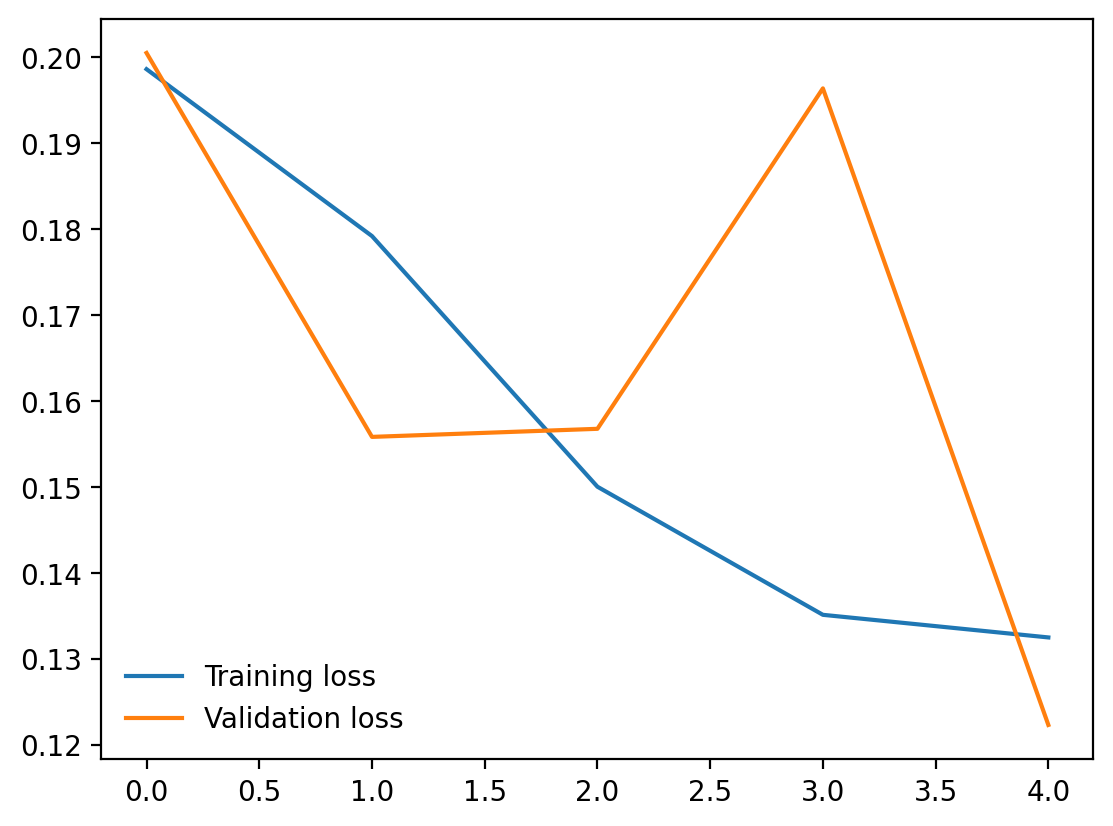

In [42]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

# Convert tensors to NumPy arrays using detach()
training_loss = [float(loss_item.detach()) for loss_item in train_losses]
validation_loss = [float(val_loss_item.detach()) for val_loss_item in val_losses]


plt.plot(training_loss, label='Training loss')
plt.plot(validation_loss, label='Validation loss')
plt.legend(frameon=False)